# Reducción de dimensionalidad

## Taller **Evaluado**.

**Profesor:** Hernán Valdivieso.

**Ayudantes**: Francisca Ibarra y Pablo Araneda.

-----


---
El siguiente _jupyter notebook_ tiene como fin ser una breve guía de creación de gráficos con interacciones utilizando la librería Altair y de utilización de reducción de dimensionalidad para algunos problemas interesantes.

Para facilitar la instalación de esta librería, este archivo debe ser subido a [Google Colab](https://colab.research.google.com/) para poder ejecutarlo en los servidores de Google, los cuales disponen de todos los recursos necesarios para ejecutar los códigos que implementarás.

Este _jupyter notebook_ se compone de 5 actividades de diferente dificultad (algunas serán preguntas en texto, otras deberán programar y comentar sobre el resultado), las cuales se dividen en 2 partes:

- Reducción de dimensionalidad con datos tabulares (2 actividades)
- Reducción de dimensionalidad con imágenes (3 actividades)

Cada actividad **puede ponderar distinto**, es decir, no asuman que cada actividad presentará el mismo puntaje.

En caso de hacer el práctico en parejas, **solo 1 debe entregar o se aplicará un descuento de 10 décimas**. Tienen hasta el **viernes 25 de Octubre 23:59 para entregar**, luego se aplicará un descuento de hasta 10 décimas por entregas de atraso. Solo se acepta hasta 24 horas de atraso.

Adicionalmente, **solo se acepta 1 respuesta/visualización por ejercicio. En caso de entregar más de una respuesta, se revisará la primera.**

⚠️⚠️ **Deben entregar este mismo archivo con las respuestas** Si entregan otro `.ipynb` con únicamente las respuestas, se aplicará descuento. ⚠️⚠️

Indique aquí los integrantes:
- `Sebastian Latorre Diaz`

## Instalar e importar librerías del práctico

In [ ]:
!pip install umap-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import altair as alt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
from sklearn.manifold import TSNE, MDS
import umap
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## Descargar _dataset_

En primer lugar, como estaremos ocupando un servidor externo, es necesario descargar el _dataset_ en dicho servidor. Para esto ocuparemos una función encargada de bajar un archivo desde Google Drive.

In [ ]:
def download_file_without_authenticate(id, destination):
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith("download_warning"):
                return value

    URL = "https://docs.google.com/uc?export=download"
    response = requests.get(URL, params={"id": id, "confirm": 1}, stream=True)

    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for i, chunk in enumerate(response.iter_content(CHUNK_SIZE)):
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)

    return None

download_file_without_authenticate("14NAdrE1FrgZMYxabOyhk9kgybdUhl2Wv", "penguins.csv")

# Reducción de dimensionalidad

Reducción de dimensionalidad es transformar los datos a una nueva representación con menos dimensiones. Por ejemplo, empezar con 10 columnas y luego calcular 2 columnas adicionales que representan más o menos la misma información que las 10 columnas iniciales.

Existen muchos tipos de formas de reducir la dimensionalidad. En esta actividad utilizaremos 4: PCA, TSNE, MDS y UMAP.

A continuación se despliegan las funciones encargadadas de tomar un _dataset_ y aplicarle uno de los 4 algoritmos de reducción de dimensionalidad para reducir el _dataset_ a 2 dimensiones/columnas. Estas funciones se ocuparán en diferentes actividades.

In [ ]:
def reducir_con_pca(data):
    """
    Principal Components Analysis (pca)
    Explicación del método en español: https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales
    """
    dim_red = PCA(n_components=2).fit(data)
    data_new_dimensions = dim_red.transform(data)
    return pd.DataFrame(data_new_dimensions, columns=["X", "Y"])


def reducir_con_tsne(data, perplexity, n_iter):
    """
    Expicación del método en inglés: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
    Este método tiene una componente aleatoria, por lo que no siempre entrega la misma distribución para un mismo set de puntos.
    """
    data_new_dimensions = TSNE(n_components=2, perplexity=perplexity,
                               n_iter=n_iter, init="random").fit_transform(data)
    return pd.DataFrame(data_new_dimensions, columns=["X", "Y"])


def reducir_con_mds(data, max_iter):
    """
    Esta es otra técnica que es posible utilizar, pero no fue vista en clases.
    Multidimensional Scalling (mds)
    Explicación del método en español: https://es.wikipedia.org/wiki/Escalamiento_multidimensional
    Este método tiene una componente aleatoria, por lo que no siempre entrega la misma distribución para un mismo set de puntos.
    """
    data_new_dimensions = MDS(n_components=2, max_iter=max_iter,
                              normalized_stress="auto").fit_transform(data)
    return pd.DataFrame(data_new_dimensions, columns=["X", "Y"])


def reducir_con_umap(data, n_neighbors):
    """
    Uniform manifold approximation and projection
    Explicación del método en ingles: https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction
    Este método tiene una componente aleatoria, por lo que no siempre entrega la misma distribución para un mismo set de puntos.
    """
    data_new_dimensions = umap.UMAP(n_neighbors=n_neighbors).fit_transform(data)
    return pd.DataFrame(data_new_dimensions, columns=["X", "Y"])

### Documentación de funciones

* `reducir_con_pca(data)`: recibe el *dataset* y retorna un DataFrame con 2 columnas obtenidas tras aplicar PCA.

* `reducir_con_tsne(data, perplexity, n_iter)`: recibe el *dataset* y dos números positivos. Retorna un DataFrame con 2 columnas obtenidas tras aplicar TSNE. Cambiar el parámetro `perplexity` y/o `n_iter` permite obtener diferentes resultados.

* `reducir_con_mds(data, max_iter)`: recibe el *dataset* y un número positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar MDS. Cambiar el parámetro `max_iter` permite obtener diferentes resultados.

* `reducir_con_umap(data, n_neighbors)`: recibe el *dataset* y un número positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar UMAP. Cambiar el parámetro `n_neighbors` permite obtener diferentes resultados.

Ejemplo de uso de las funciones:

```python
pca_dataset = reducir_con_pca(dataset)
tsne_dataset = reducir_con_tsne(dataset, 60, 300)
```

Ahora cargamos los datos que usaremos. En esta ocasión, corresponde a información de 3 especies de pingüinos.

In [ ]:
penguins = pd.read_csv("penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Podemos notar que tenemos datos `NaN` y datos categóricos. En esta ocasión vamos a transformar las categorías a número y eliminar los `NaN`.

In [ ]:
# Eliminar nan
data = penguins.dropna().copy()

# Transformar categorías a números
data.island = preprocessing.LabelEncoder().fit_transform(data.island)
data.sex = preprocessing.LabelEncoder().fit_transform(data.sex)

print(data.shape)
data.head()

(333, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,2,39.1,18.7,181.0,3750.0,1,2007
1,Adelie,2,39.5,17.4,186.0,3800.0,0,2007
2,Adelie,2,40.3,18.0,195.0,3250.0,0,2007
4,Adelie,2,36.7,19.3,193.0,3450.0,0,2007
5,Adelie,2,39.3,20.6,190.0,3650.0,1,2007


Ahora vamos a empezar con la reducción de dimensionalidad. Primero tenemos que indicar cuáles columnas vamos a utilizar y luego llamar a las funciones que creamos anteriormente. Se invita a ver qué sucede si se quita alguna columna.

In [ ]:
# Vamos a indicar qué columnas utilizar para la reducción de dimensionalidad.
columnas = ["island", "bill_length_mm", "bill_depth_mm",
            "flipper_length_mm", "body_mass_g", "sex"]

# Generamos un dataframe con solo las columnas de interes.
data_to_reduce = data[columnas]

# Normalizamos.
data_to_reduce = (data_to_reduce - data_to_reduce.min()) / (data_to_reduce.max() - data_to_reduce.min())

# Aplicamos reducción de dimensionalidad al dataset.
# Aquí cada variable será un DataFrame con 2 columnas que corresponde a
# la reducción de dimensionalidad pero con diferentes técnicas.
pca_data = reducir_con_pca(data_to_reduce)
tsne_data = reducir_con_tsne(data_to_reduce, perplexity=3, n_iter=500)
mds_data = reducir_con_mds(data_to_reduce, max_iter=170)
umap_data = reducir_con_umap(data_to_reduce, n_neighbors=8)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Luego nos encargamos de crear un *scatterplot* por cada reducción aplicada. Adicionalmente, pintaremos cada punto en función de la especie del pingüino.

In [ ]:
# Esta función creará los gráficos que vamos a usar.
def make_chart(dataset, metodo):
    """
    :param dataset: dataframe con los datos
    :param metodo: string con el método de reducción utilizado
    :return un Chart de Altair
    """
    source = pd.DataFrame(dataset.copy())
    source['species'] = data['species'].values

    chart = alt.Chart(source).mark_circle().encode(
        x=alt.X('X', axis=alt.Axis(title=f'{metodo}-X')),
        y=alt.Y('Y', axis=alt.Axis(title=f'{metodo}-Y')),
        color=alt.Color('species:N'),
    ).properties(width=400, height=200)
    return chart

# Se crean los gráficos para cada uno de
# los DataFrame obtenidos en las distintas reducciones.
pca_chart = make_chart(pca_data, "PCA")
tsne_chart = make_chart(tsne_data, "TSNE")
mds_chart = make_chart(mds_data, "MDS")
umap_chart = make_chart(umap_data, "UMAP")


# Los organizamos y mostramos.
((pca_chart & umap_chart)|( mds_chart & tsne_chart))

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: Futu

alt.HConcatChart(...)

## Actividad 1

Comente qué observa en esta reducción de dimensionalidad. En particular:
- ¿Hay algún método que separe bien las 3 clases (especie de pingüino)?
- ¿Hay alguna clase (especie de pingüino) que esté más separada al resto?
- Para los datos que están superpuestos en el gráfico de dispersión, ¿por qué sucede esto?

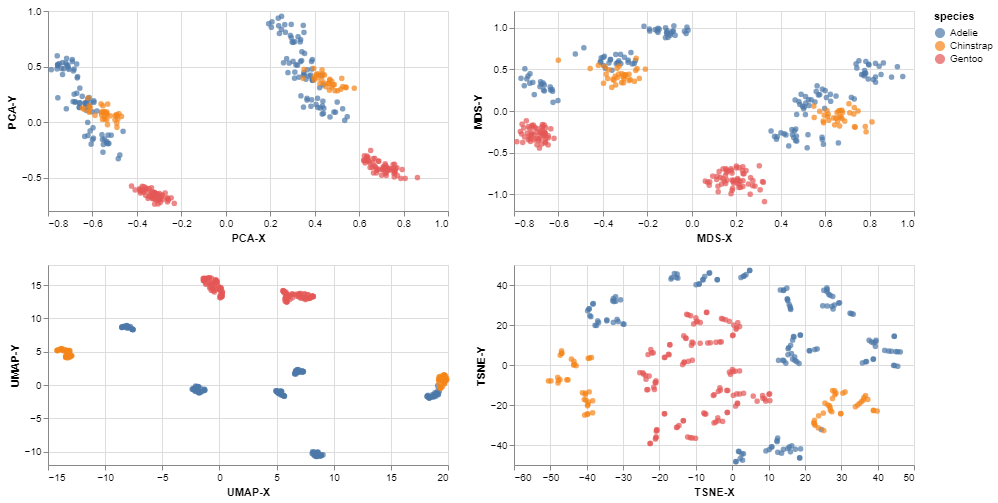
`Respuesta:`

1.
*   Desde mi perspectiva, el método que mejor separa las clases es TSNE, ya que no se observa una mezcla significativa de las especies. En el gráfico de TSNE, podemos distinguir tres grupos de forma clara: en la parte superior e inferior vemos la clase Adelie (azul), en el centro la clase Gentoo (rojo), y en la parte derecha e izquierda, la clase Chinstrap (amarillo). Esto indica que TSNE realiza una mejor separación entre las especies.
*   En cambio, en los gráficos de PCA, MDS y UMAP, hay una superposición entre las clases Adelie y Chinstrap en algunas áreas, lo que dificulta una separación tan clara como la que se observa en TSNE.

2.
*   Sí, la especie Gentoo está claramente separada en los gráficos de PCA y UMAP. En ambos gráficos, los puntos rojos correspondientes a la especie Gentoo están alejados del resto, lo que indica una buena separación de esta clase.
*   En MDS, la separación también es visible, pero no tan clara como en PCA y UMAP.
*   En TSNE, aunque hay cierta separación, es menos evidente debido a la dispersión de los puntos.

3.
*   La superposición de los datos ocurre porque las diferentes especies de pingüinos pueden compartir características similares en algunos de los atributos que fueron utilizados para la reducción de dimensionalidad. Específicamente, algunas especies pueden tener valores cercanos en las características como el tamaño de las aletas, la masa corporal o el sexo, lo que provoca que los métodos de reducción de dimensionalidad no logren separarlos perfectamente en el espacio de dos dimensiones. Esta limitación es más evidente en los métodos de PCA y MDS, donde las especies están más mezcladas y algunos puntos quedan superpuestos (Azules y Amarillos - Adelie y Chinstrap)



## Actividad 2

A continuación se presentará un _dataset_ con información de flores y diversas funciones para aplicar los métodos de reducción de dimensionalidad.
1. Debe probar cada método de reducción de dimensionalidad y visualizar el _dataset_ reducido al igual que el gráfico anterior.
2. Finalmente, debe responder unas preguntas en relación a esta actividad.

Ahora vamos a cargar los datos.

In [ ]:
iris = datasets.load_iris()
dataset = iris.data
classes = [iris.target_names[x] for x in iris.target]

df = pd.DataFrame(dataset, columns=iris.feature_names)
df["classes"] = classes
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Completar el siguiente código y luego responder la pregunta.

In [ ]:
# # Esta función creará los gráficos que vamos a usar. NO TOCAR.
# def make_chart(data, metodo):
#     """
#     :param data: dataframe con los datos
#     :return un Chart de Altair
#     """
#     source = pd.DataFrame(data.copy())
#     source['classes'] = classes

#     chart = alt.Chart(source).mark_circle().encode(
#         x=alt.X('X', axis=alt.Axis(title=f'{metodo}-X')),
#         y=alt.Y('Y', axis=alt.Axis(title=f'{metodo}-Y')),
#         color=alt.Color('classes:N'),
#     ).properties(width=200, height=200)
#     return chart

# # Vamos a indicar qué columnas utilizar para la reducción de dimensionalidad.
# columnas = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# # Generamos un dataframe con solo las columnas de interes.
# data_to_reduce = df[columnas]

# # Normalizamos.
# data_to_reduce = (data_to_reduce - data_to_reduce.min()) / (data_to_reduce.max() - data_to_reduce.min())

# # Crear los datasets mediante reducción de dimensionalidad,
# # revise el ejemplo anterior para ver cómo generar los datasets.
# # IMPORTANTE: Ocupe las funciones que nosotros le damos.
# pca_data = "COMPLETAR"
# tsne_data = "COMPLETAR"
# mds_data = "COMPLETAR"
# umap_data = "COMPLETAR"


# # Se crean los gráficos para cada uno de los datos. Use la función `make_chart`. SÍ TOCAR.
# pca_chart = "COMPLETAR"
# tsne_chart = "COMPLETAR"
# mds_chart = "COMPLETAR"
# umap_chart = "COMPLETAR"


# # Los organizamos y mostramos. NO TOCAR.
# (((pca_chart & umap_chart)|( mds_chart & tsne_chart)))

In [ ]:
from sklearn import datasets
import pandas as pd
import altair as alt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
import umap

# Cargar el dataset Iris.
iris = datasets.load_iris()
dataset = iris.data
classes = [iris.target_names[x] for x in iris.target]

df = pd.DataFrame(dataset, columns=iris.feature_names)
df["classes"] = classes
df

# Esta función creará los gráficos que vamos a usar.
def make_chart(data, metodo):
    """
    :param data: dataframe con los datos
    :return un Chart de Altair
    """
    source = pd.DataFrame(data.copy())
    source['classes'] = classes

    chart = alt.Chart(source).mark_circle().encode(
        x=alt.X('X', axis=alt.Axis(title=f'{metodo}-X')),
        y=alt.Y('Y', axis=alt.Axis(title=f'{metodo}-Y')),
        color=alt.Color('classes:N'),
    ).properties(width=200, height=200)
    return chart

# Seleccionamos las columnas para la reducción de dimensionalidad.
columnas = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Creamos un DataFrame solo con las columnas de interés.
data_to_reduce = df[columnas]

# Normalizamos los datos.
data_to_reduce = (data_to_reduce - data_to_reduce.min()) / (data_to_reduce.max() - data_to_reduce.min())

# Reducción de dimensionalidad usando PCA.
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(data_to_reduce), columns=['X', 'Y'])

# Reducción de dimensionalidad usando TSNE.
tsne = TSNE(n_components=2, perplexity=30, n_iter=500)
tsne_data = pd.DataFrame(tsne.fit_transform(data_to_reduce), columns=['X', 'Y'])

# Reducción de dimensionalidad usando MDS.
mds = MDS(n_components=2, max_iter=300)
mds_data = pd.DataFrame(mds.fit_transform(data_to_reduce), columns=['X', 'Y'])

# Reducción de dimensionalidad usando UMAP.
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2)
umap_data = pd.DataFrame(umap_model.fit_transform(data_to_reduce), columns=['X', 'Y'])

# Crear los gráficos usando la función make_chart.
pca_chart = make_chart(pca_data, "PCA")
tsne_chart = make_chart(tsne_data, "TSNE")
mds_chart = make_chart(mds_data, "MDS")
umap_chart = make_chart(umap_data, "UMAP")

# Organizar y mostrar los gráficos.
(pca_chart & umap_chart) | (mds_chart & tsne_chart)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`

alt.HConcatChart(...)

Dadas las 4 técnicas:
1. ¿Cuál reduce mejor la información para separar cada clase? Justifique.

2. Por otro lado, asuma que llega un nuevo dato de una flor, pero no se sabe su clase (Setosa, Versicolour o Virginica). Explique cómo se puede reconocer a qué clase corresponde gracias a la reducción de dimensionalidad. En otras palabras, asumiendo que le llega un dato nuevo del que desconoce su clase, ¿cómo es posible determinar su clase (tipo de planta) solo usando (1) los gráficos obtenidos de reducción de dimensionalidad y (2) las funciones para reducir la dimensión?

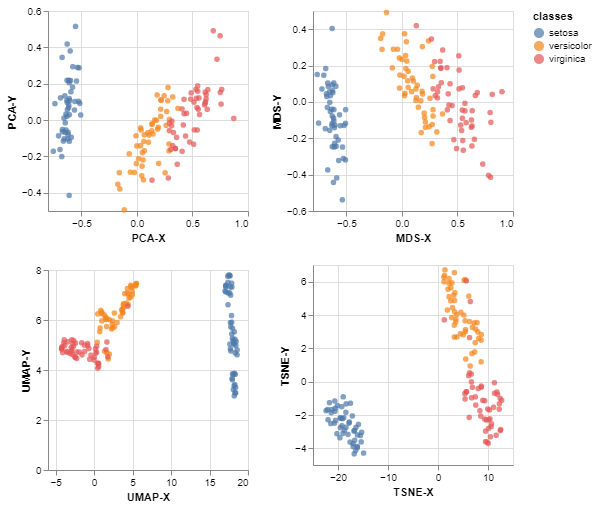

**Respuesta:** **COMPLETAR**

1.
*   `TSNE`: Segun mi perspectiva considero que el método que mejor separa las clases en este caso es TSNE. A pesar que algunos puntos de la clase Virginica (rojos) se mezclan con los puntos de la clase Versicolor (amarillos). En general, la separación entre las tres clases es más clara en TSNE comparado con los otros métodos. Se puede observar que las clases Setosa (azul) están completamente separadas, y aunque hay alguna superposición entre Versicolor y Virginica (amarillo y rojo), la separación sigue siendo más clara que en otros métodos.

*   UMAP: Le daría segundo lugar a UMAP, ya que logra una separación aceptable, especialmente para la clase Setosa (azul), pero creo que la superposición entre Versicolor y Virginica (amarillo y rojo) es mayor en comparación con TSNE.

*   PCA y MDS: ocupan el tercer lugar, ya que muestran una mayor mezcla de puntos en igual medida en PCA y MDS, entre las clases Versicolor y Virginica (amarillos y rojos). Si bien logran alguna separación de las clases, especialmente en PCA, la diferencia no es tan clara como en TSNE o UMAP, lo que podría dificultar la clasificación visual de nuevos puntos.


2.


Suponiendo que se recibe un nuevo dato de una flor, pero sin conocer su clase (Setosa, Versicolor o Virginica). Podriamos seguir los siguientes pasos para determinar a que clase corresponde:

*   `Aplicar metodos de reducción de dimensionalidad`: Aplicamos los 4 métodos de reducción de dimensionalidad (TSNE, UMAP, PCA y MDS) al nuevo dato de la flor. Esto requiere utilizar las mismas funciones y parámetros que usamos originalmente para reducir la dimensionalidad del dataset.

*   `Posicionamiento en el gráfico`: Una vez reducido a dos dimensiones, el nuevo punto aparecerá en una posición específica dentro de cada uno de los gráficos que ya hemos generado. Si, por ejemplo, el nuevo punto cae en una región donde predominan las muestras de la clase Setosa, podríamos suponer que la nueva flor es probablemente de la clase Setosa.

*   `Asignación de clase según proximidad`: Para reforzar esta hipótesis, podríamos verificar qué clase está más cercana al nuevo punto en el espacio reducido. Esta técnica se asemeja a un método de clasificación basado en vecinos más cercanos (k-NN), donde un nuevo dato es clasificado en función de los datos de entrenamiento más cercanos. Si el nuevo punto está más cerca de una región dominada por puntos azules (Setosa), entonces es probable que sea una flor de esa clase.

# Reducción de dimensión en imágenes

A continuación vamos a tomar diferentes imágenes de letras escritas a mano ([MNIST database](https://en.wikipedia.org/wiki/MNIST_database)). Estas son imágenes de 8 x 8 píxeles, por lo tanto, podemos decir que para cada imagen hay información de 64 píxeles, en otras palabras, se puede interpretrar como 64 columnas/_features_ por ítem.

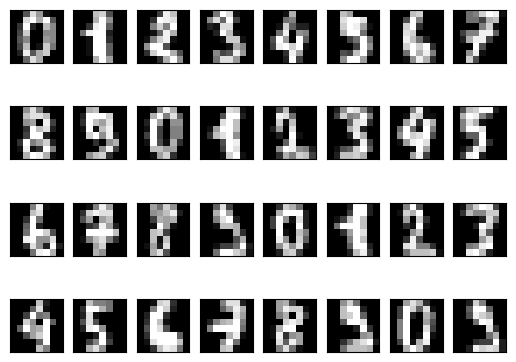

In [ ]:
# Cargar dataset
dataset = datasets.load_digits()
data_digits = np.array([x.flatten() for x in dataset.images])

# Visualizar algunas imágenes
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(dataset.images[i], cmap='gray')

Ahora vamos a generar un gráfico de dispersión con PCA y, a cada punto, le asignaremos un color según el dígito que corresponda.

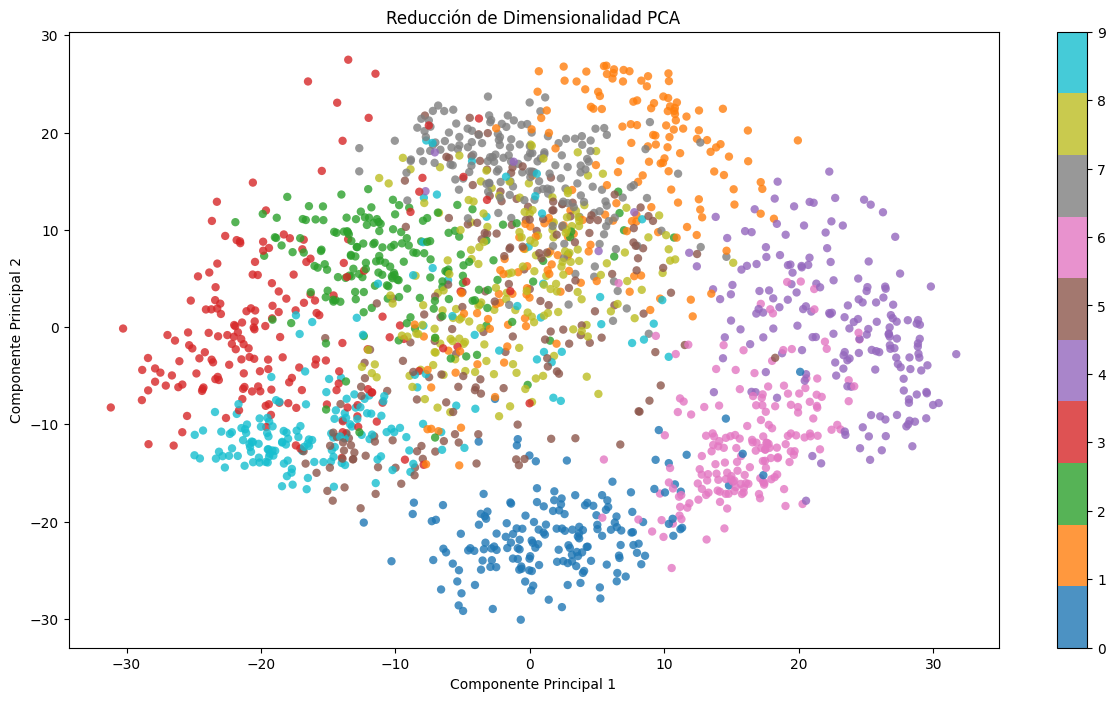

In [ ]:
# Código PCA
pca = PCA(2)
projected = pca.fit_transform(data_digits)

plt.figure(figsize=(15, 8))
plt.scatter(projected[:, 0], projected[:, 1], c=dataset.target, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colormaps['tab10'] )

plt.title('Reducción de Dimensionalidad PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

Ahora aplicaremos TSNE.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


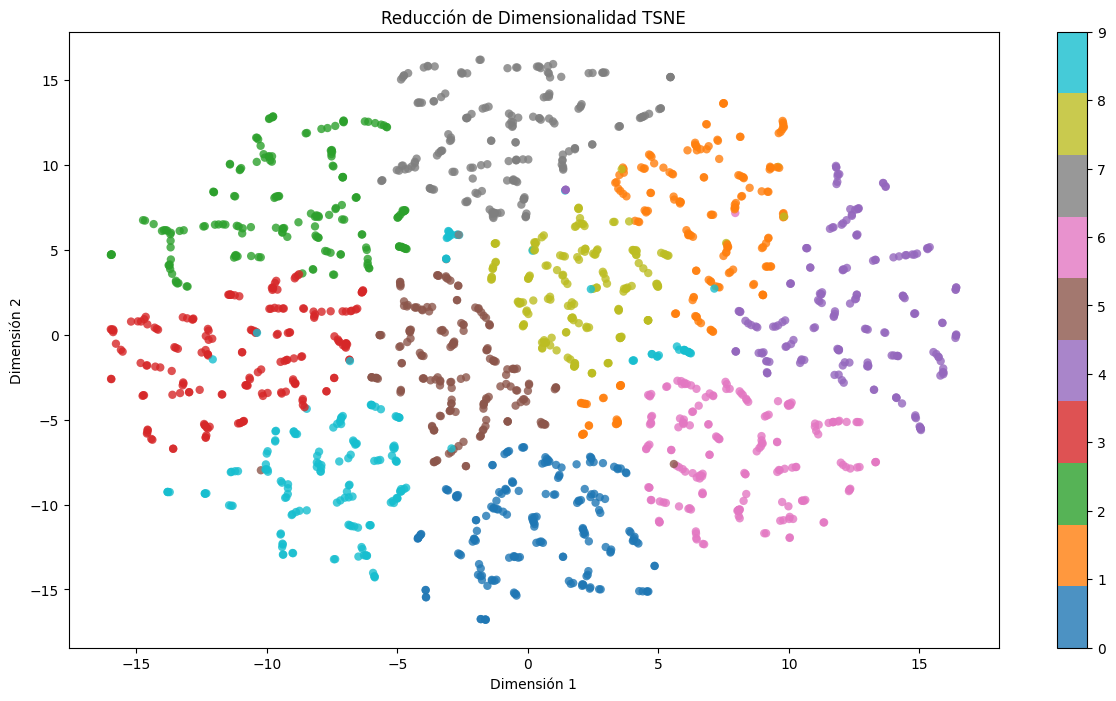

In [ ]:
# Código TSNE
tsne = TSNE(n_components=2, perplexity=2, n_iter=300)
projected = tsne.fit_transform(data_digits)

plt.figure(figsize=(15, 8))
color = matplotlib.colormaps['tab10']
plt.scatter(projected[:, 0], projected[:, 1], c=dataset.target, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colormaps['tab10'])

plt.title('Reducción de Dimensionalidad TSNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar()
plt.show()

## Actividad 3

Comente qué observa de diferente entre la visualización de TSNE y PCA.

`Respuesta:`

La diferencia que se observa entre las visualizaciones de PCA y TSNE es la forma en que los datos están distribuidos los graficos:

*    PCA tiende a distribuir los datos a lo largo de direcciones que maximizan la varianza total, pero puede no capturar correctamente las relaciones locales entre los datos. En la visualización de PCA, los dígitos no se agrupan de manera tan clara, y algunos grupos de dígitos (como el 3 y el 8) parecen superponerse más.

*   TSNE, por otro lado, está diseñado para preservar las relaciones locales, es decir, intenta mantener cerca en el espacio reducido aquellos puntos que eran cercanos en el espacio original. En la visualización de TSNE, los dígitos están mucho mejor agrupados en "clusters", y los dígitos diferentes están más separados, lo que facilita la distinción entre ellos. Aunque puede haber algunas superposiciones pequeñas, como entre el 4 y el 9, la separación es generalmente más clara en comparación con PCA.

## Actividad 4

Reutilice el código de TSNE para visualizar los dígitos, pero **cambie el argumento de perplejidad y de iteración cuando se crea el objeto `TSNE`** (`perplexity` y `n_iter`). ¿Qué diferencias observa? ¿Se separaron mejor las clases? Comente.

In [ ]:
# Código de TSNE con otro valor
# Completar.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


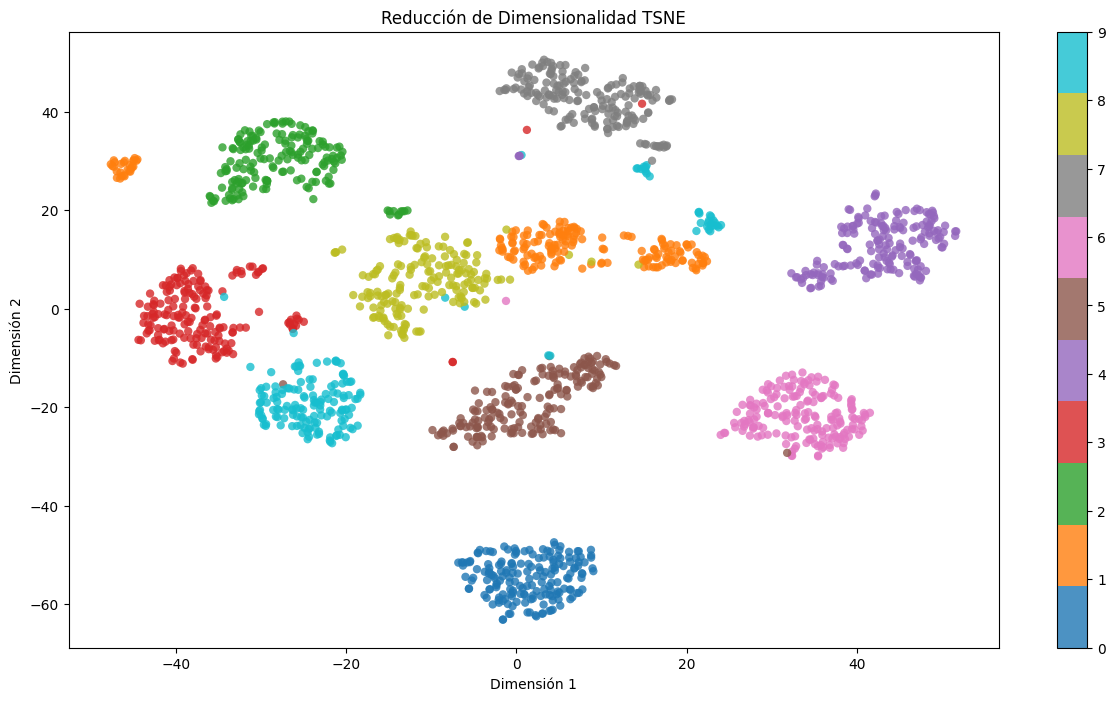

In [ ]:
# Código TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
projected = tsne.fit_transform(data_digits)

plt.figure(figsize=(15, 8))
color = matplotlib.colormaps['tab10']
plt.scatter(projected[:, 0], projected[:, 1], c=dataset.target, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colormaps['tab10'])

plt.title('Reducción de Dimensionalidad TSNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar()
plt.show()

`Respuesta:`

Al cambiar el valor de la perplejidad a 30 y aumentar el número de iteraciones a 1000, se logra mejorar la separacion de clases, haciendo que los digitos se ajusren de forma mas clara, lo que facilita la distincion entre clases. Al aplicar estos cambios se pueden observar las siguientes diferencias en los gráficos:

*   Perplejidad: Este parámetro controla cómo TSNE equilibra la consideración de vecinos cercanos y lejanos en la reducción de dimensionalidad. Un valor de perplejidad más alto (como 30) nos permite que el algoritmo considere un número mayor de vecinos, lo que puede dar como resultado un agrupamiento mucho más claro de los puntos. En este caso, con una perplejidad mayor, los dígitos parecen estar mejor agrupados, especialmente para aquellos que originalmente estaban más superpuestos, como el 3 y el 8.

* Número de Iteraciones: Al aumentar el número de iteraciones a 1000, TSNE tiene más tiempo para ajustar la posición de los puntos en el espacio reducido, lo que generalmente conduce a una convergencia más estable. En este caso, los dígitos están más claramente separados, y las clases parecen estar mejor definidas. Los resultados son más precisos en comparación con un menor número de iteraciones.

### Visualización de imágenes con gráfico de dispersión

En los ejemplos anteriores, cada imagen fue asociada a un punto con color en donde el canal de color codificaba el dígito correspondiente, pero a veces nos interesa ver las imágenes. Por lo tanto, ahora creamos una función que después nos ayudará a visualizar las imágenes tras aplicar una reducción de dimensionalidad. No es necesario aprender cómo está programada la función, solo entender que su funcionalidad es posicionar imágenes en un gráfico dadas 2 posiciones (x, y).

In [ ]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.01):

    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i],
                                                                      zoom=3,
                                                                      cmap="gray"),proj[i])
            ax.add_artist(imagebox)

Y ahora solo vamos a trabajar con 100 imágenes.

In [ ]:
N = 100 # Cantidad de imagenes a trabajar
data_digits = np.array([x.flatten() for x in dataset.images[:N]])

### PCA

Vamos a probar reducir esas 64 columnas por imagen en 2 columnas, luego, utilizar esas 2 columnas como coordenadas (x,y) para posicionar la imagen y ver cómo se organizan estas.

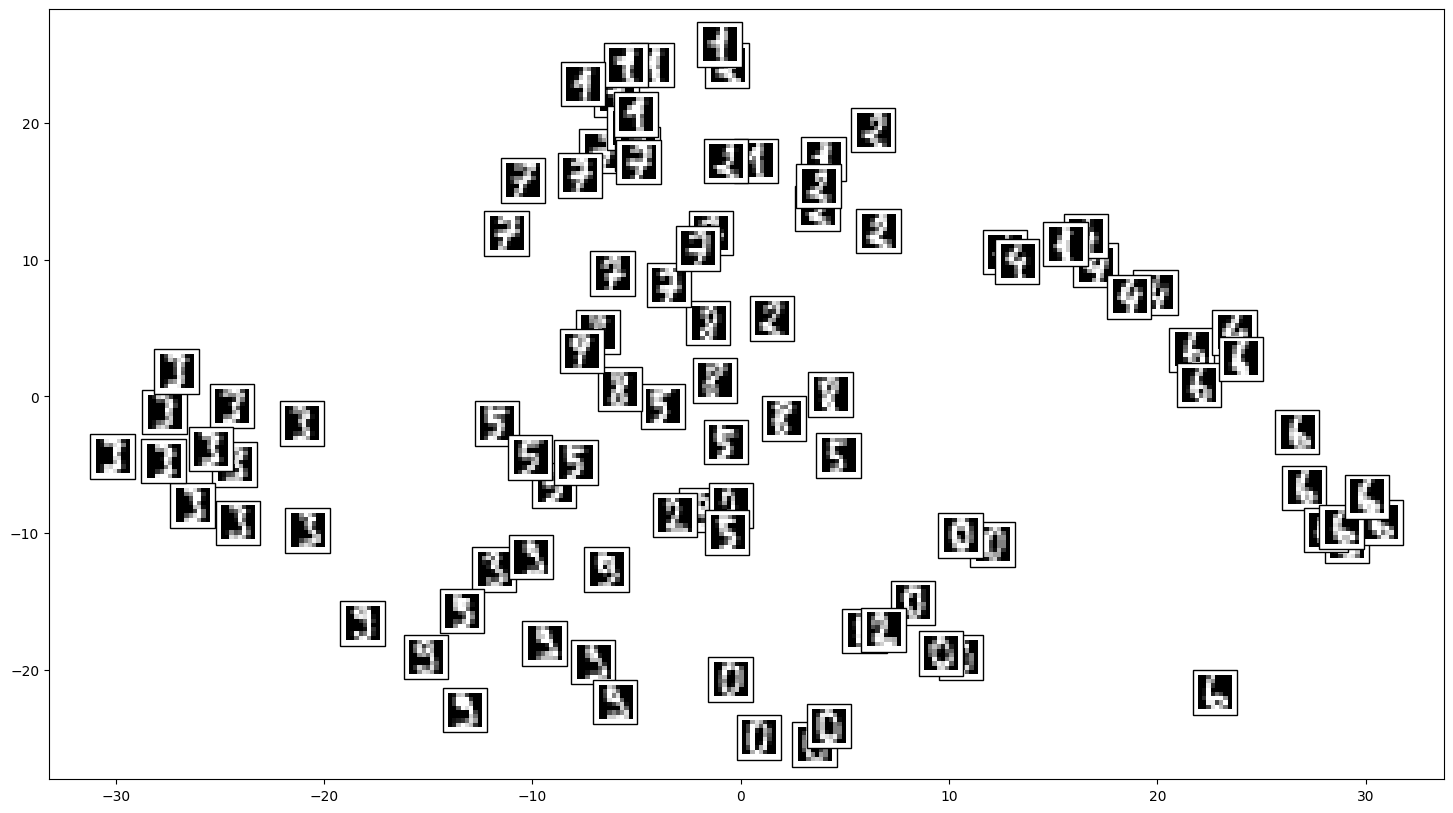

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
plot_components(data_digits, model=PCA(n_components=2), images=dataset.images[:N])

#### Observación
Podemos ver que algunos números se agrupan entre sí, esto es, porque la información de sus 64 columnas es similar y cuando se aplica la reducción de dimensión, las 2 columnas que quedan contienen casi la misma información y por ello, van a tender a estar juntas las imágenes similares. Ahora utilicemos otra técnica de reducción.



### TSNE


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


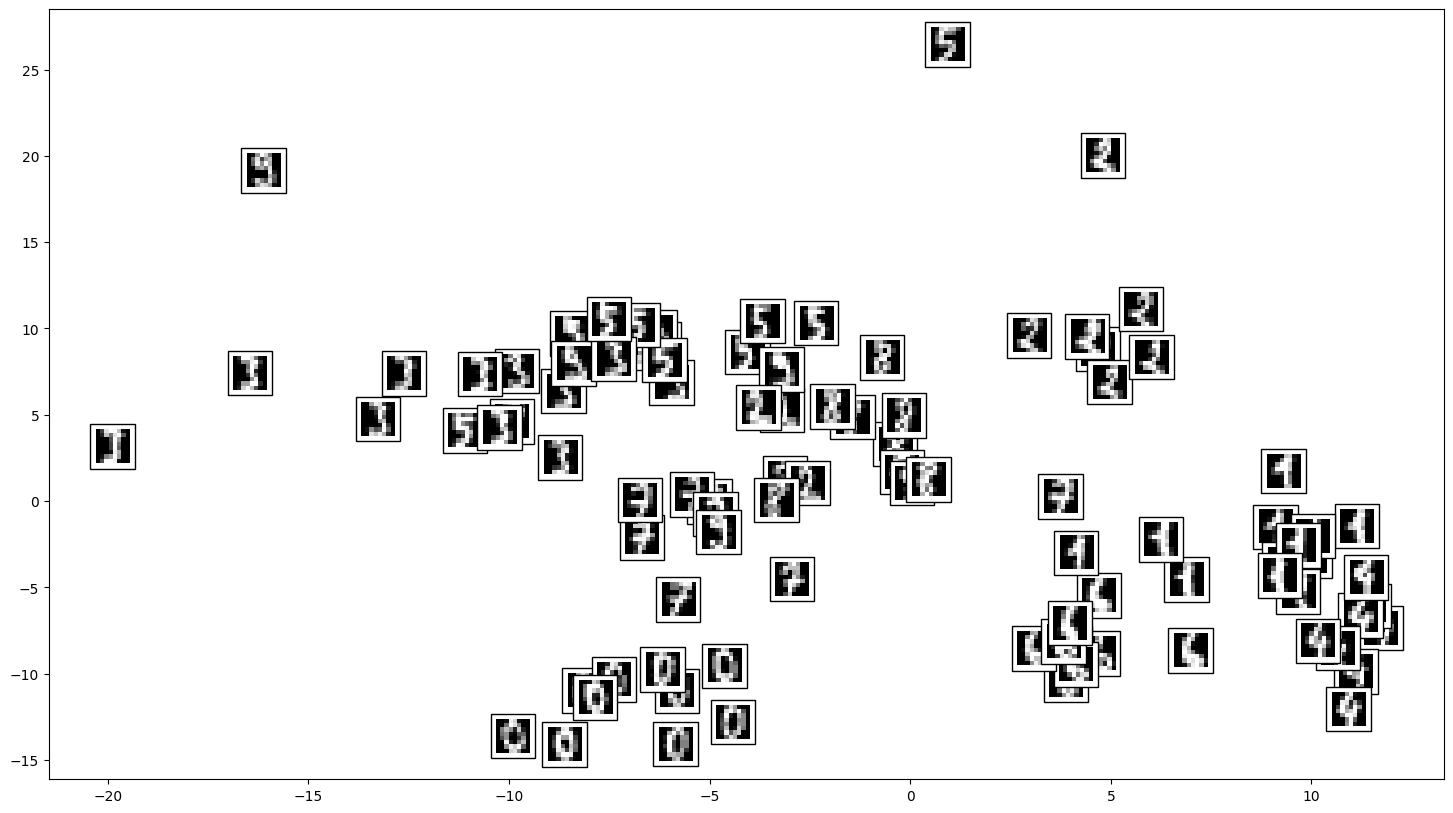

In [ ]:
perplexity = 4 # Probar con valores que deseen numérico
n_iter = 250 # Probar con valores que deseen numérico

fig, ax = plt.subplots(figsize=(18, 10))
plot_components(data_digits, model=TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter),
                images=dataset.images[:N])

#### Observación

En este caso, como TSNE contiene una variante aleatoria y posibles parámetros para configurar la reducción, la imagen final puede ser muy distinta. Te invito a intentar cambiar los parámetros para ver si llega a salir una visualización que tenga mejor separación de los números.

### UMAP

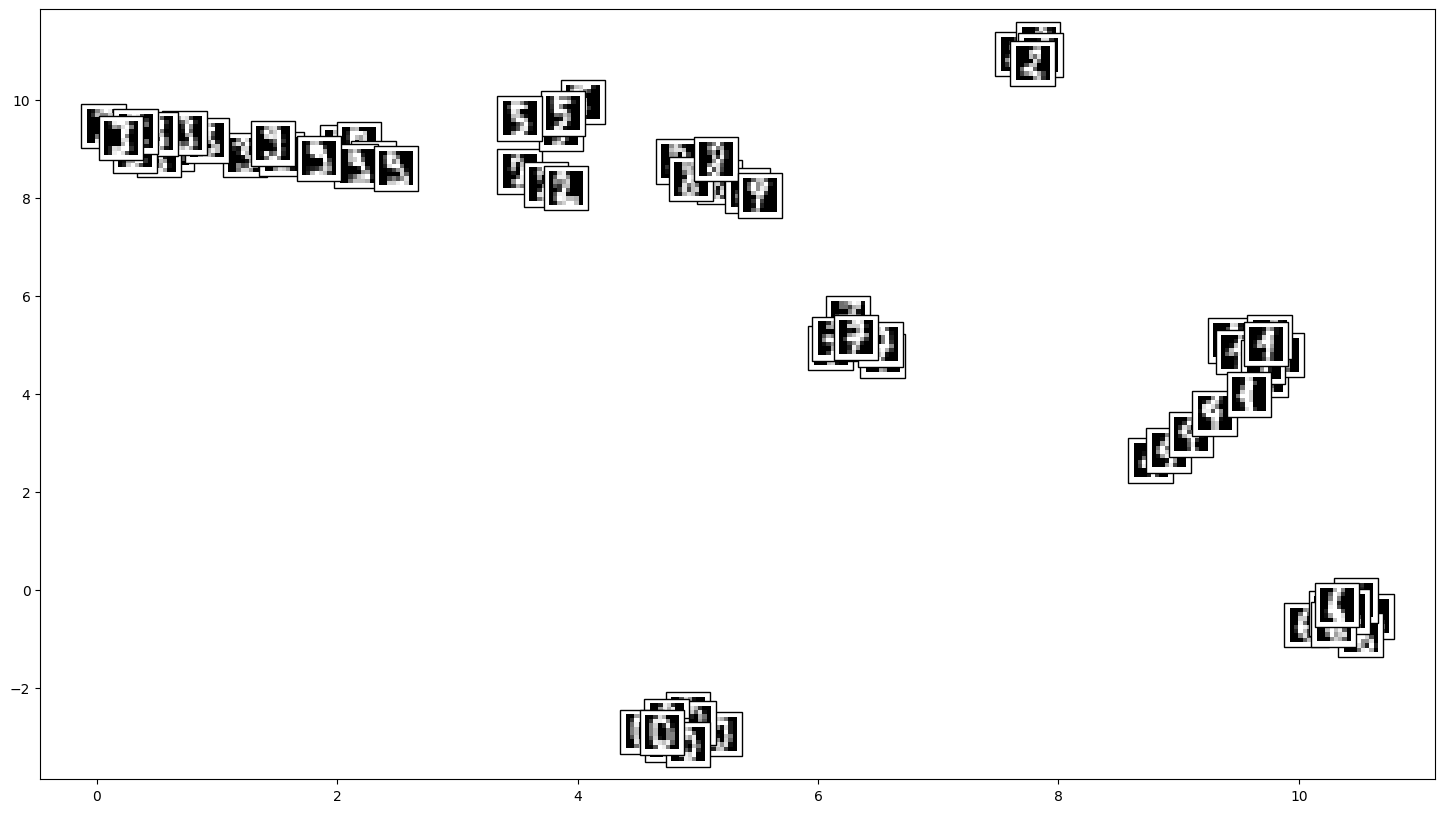

In [ ]:
n_neighbors = 10 #Valor de 2 a 100

fig, ax = plt.subplots(figsize=(18, 10))
plot_components(data_digits, model=umap.UMAP(n_neighbors=n_neighbors), images=dataset.images[:N])

#### Observación

Podemos apreciar que bajo UMAP, los números quedaron mucho más agrupados entre sí y separados de otros, lo cual permite mostrar que esta reducción de dimensión logra bajar de 64 columnas a 2 y mantiene bastante información de los datos para poder seguir distinguiendo una clase de otra.

## Actividad 5

A continuación se cargará otro _dataset_ con imágenes. En este caso serán obras de arte. Cada imagen tiene asociada un vector de 2048 características, es decir, 2048 columnas.

1. Aplique 2 técnicas de reducción de dimensionalidad diferentes a dicho _dataset_ y visualice las imágenes en una grilla como en el ejemplo anterior. A continuación se entregará una serie de funciones para facilitar todo este proceso, lea la documentación entregada. **Importante:** usar la misma técnica de reducción con 2 parámetros distintos no será aceptado, debe utilizar 2 técnicas distintas (por ejemplo, PCA vs TSNE).

2. Agregue una observación (como se hizo con los dígitos) en donde compare ambas visualizaciones. ¿Las pinturas similares quedan juntas? ¿Hay alguna pintura que no concuerda en algún _cluster_? ¿Qué aspectos tienen en común las imágenes que están juntas en la visualización? Comente.



### Descargar dataset



Como el archivo es pesado, lo bajaremos con `gdown`. El archivo tambien lo pueden encontrar aquí: https://drive.google.com/file/d/1LRxdcv6bwPLYFcHe1uYYUlJVsPk9760B/view?usp=sharing

In [ ]:
!gdown 1LRxdcv6bwPLYFcHe1uYYUlJVsPk9760B -O surdoc.zip

Downloading...
From (original): https://drive.google.com/uc?id=1LRxdcv6bwPLYFcHe1uYYUlJVsPk9760B
From (redirected): https://drive.google.com/uc?id=1LRxdcv6bwPLYFcHe1uYYUlJVsPk9760B&confirm=t&uuid=5cf056ac-2d06-4f76-a6f8-a50327255a1c
To: /content/surdoc.zip
100% 46.7M/46.7M [00:00<00:00, 97.8MB/s]


In [ ]:
from IPython.display import clear_output

!unzip -o surdoc

clear_output() # Limpiar ventana para que no se vea despues.
!ls

features  images  __MACOSX  penguins.csv  sample_data  surdoc.zip


### Cargar información

Esto cargará 100 imágenes de las aproximadamente 400 que hay. Cada vez que ejecutes la siguiente casilla, se seleccionarán 100 de forma aleatoria

In [ ]:
import os
import random
import cv2


images = []
dataset = []
images_path = random.sample(os.listdir("images"), 100)
for image in images_path:
  if image.endswith(".jpg"):
    image_file = cv2.imread(os.path.join("images", image))
    resized = cv2.resize(image_file, (20, 30), interpolation = cv2.INTER_AREA)
    images.append(resized)

    npy = image[:-3] + "npy"
    dataset.append(np.load(os.path.join("features", npy)))

images_surdoc = np.array(images)
dataset_surdoc = np.array(dataset)

Vemos algunas imágenes.

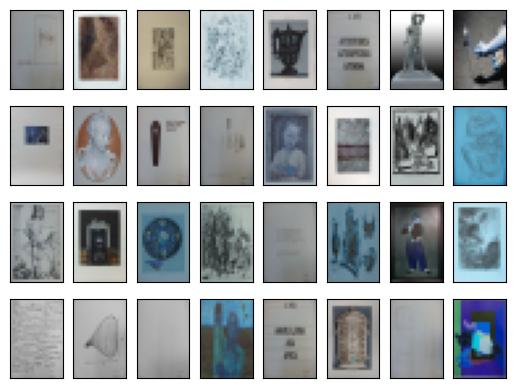

In [ ]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_surdoc[i])

### Funciones

A continuación se presenta una nueva funciones a utilizar para visualizar imágenes. No es necesario entender su funcionamiento línea a línea, solo que dado un dataset de 2 columnas, la función posiciona las fotos en el gráfico.

In [ ]:
def visualizar(dataset_reducido, metodo):
  """
  Método utilizado para visualizar las obras de arte
  """
  print(metodo)
  fig, ax = plt.subplots(figsize=(25, 10)) # AQUÍ PUEDEN CAMBIAR EL TAMAÑO DEL GRÁFICO
  ax = ax or plt.gca()
  proj = dataset_reducido.values
  ax.plot(proj[:, 0], proj[:, 1], '.k')

  if images is not None:
      min_dist_2 = (0.001 * max(proj.max(0) - proj.min(0))) ** 2
      shown_images = np.array([2 * proj.max(0)])
      for i in range(proj.shape[0]):
          dist = np.sum((proj[i] - shown_images) ** 2, 1)
          if np.min(dist) < min_dist_2:
              # don't show points that are too close
              continue
          shown_images = np.vstack([shown_images, proj[i]])
          imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i],
                                                                    zoom=2,
                                                                    cmap="gray"),proj[i])
          ax.add_artist(imagebox)

### Documentación de funciones (Los mismas definidas anteriormente + una para visualizar)

* `reducir_con_pca(data)`: recibe el *dataset* y retorna un DataFrame con 2 columnas obtenidas tras aplicar PCA.

* `reducir_con_tsne(data, perplexity, n_iter)`: recibe el *dataset* y dos números positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar TSNE. Cambiar el parámetro `perplexity` y/o `n_iter` permite obtener diferentes resultados.

* `reducir_con_mds(data, max_iter)`: recibe el *dataset* y un número positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar MDS. Cambiar el parámetro `max_iter` permite obtener diferentes resultados.

* `reducir_con_umap(data, n_neighbors)`: recibe el *dataset* y un número positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar UMAP. Cambiar el parámetro `n_neighbors` permite obtener diferentes resultados.

* `visualizar(dataset_reducido, metodo)`. Recibe el *dataset* generado por las funciones detalladas anteriormente y un *string* para poner antes del *dataset*.


Ejemplo de uso de las funciones:

```python
tsne_dataset_version_1 = reducir_con_tsne(dataset_surdoc, 30, 250)
tsne_dataset_version_2 = reducir_con_tsne(dataset_surdoc, 60, 300)
visualizar(tsne_dataset_version_1, "TSNE con perplexity de 30")
```

### Generar gráficos

In [ ]:
# Gráfico 1
# Completar.

PCA


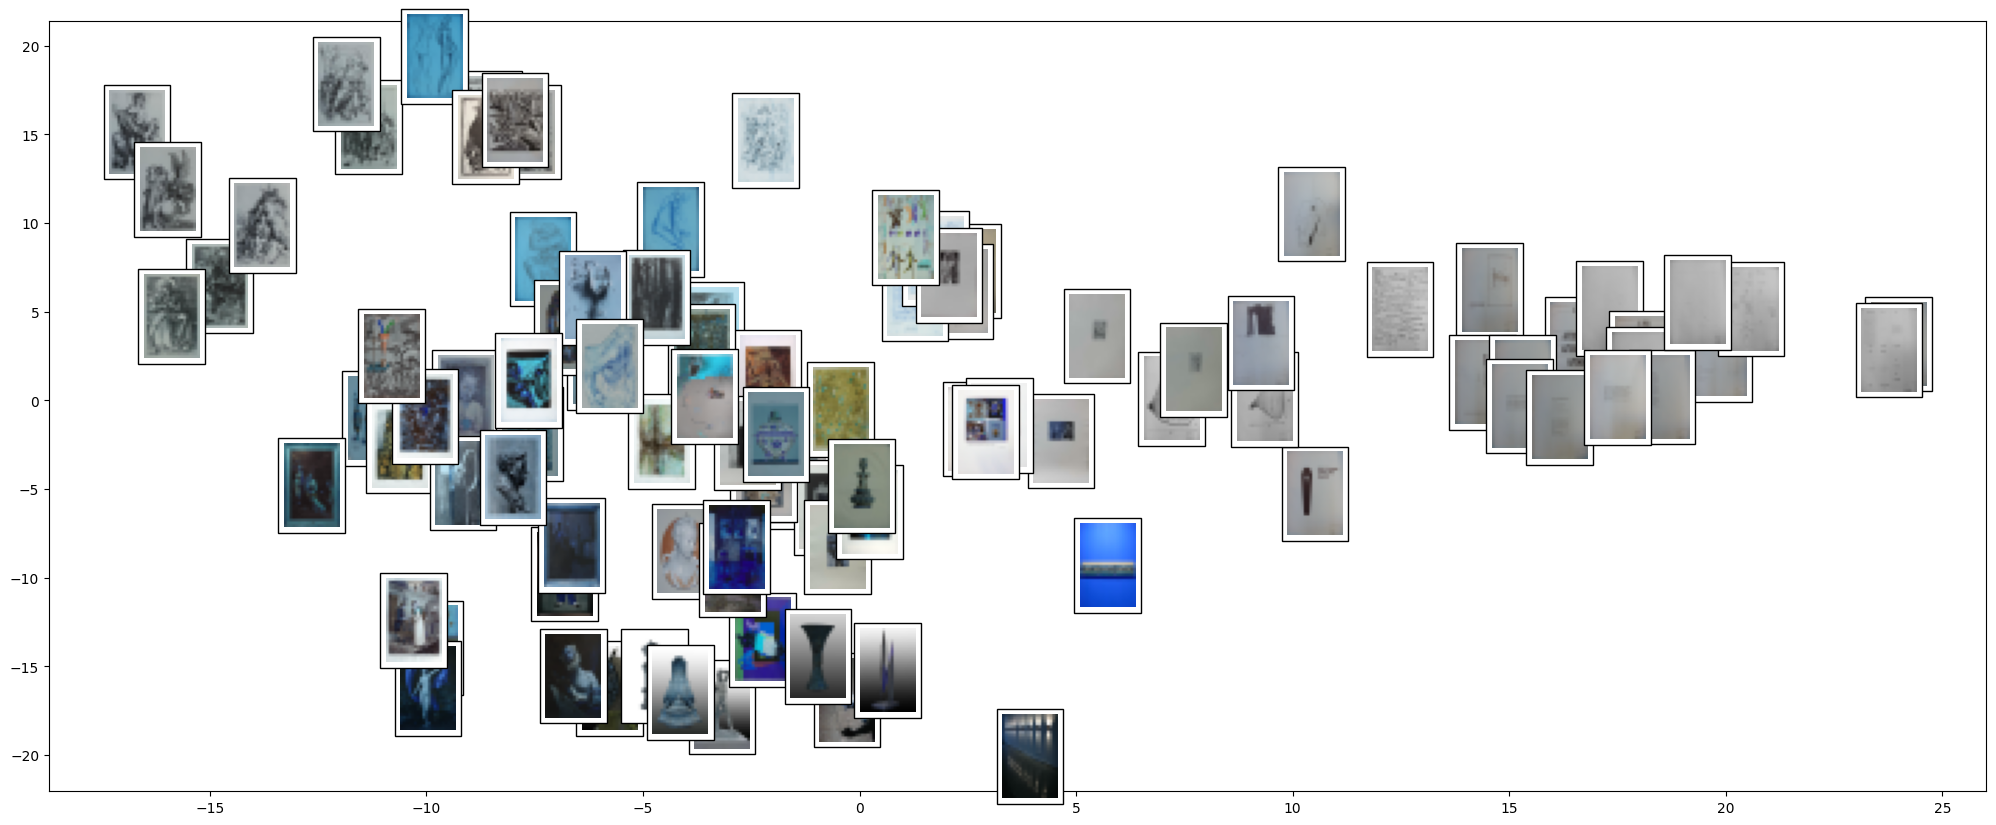

In [ ]:
# Función para reducción con PCA
def reducir_con_pca(data):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    return pd.DataFrame(pca_result, columns=['PCA_1', 'PCA_2'])

# Aplicamos PCA
pca_dataset = reducir_con_pca(dataset_surdoc)

# Visualizamos el resultado con PCA
visualizar(pca_dataset, "PCA")


In [ ]:
# Gráfico 2
# Completar.

UMAP con n_neighbors=15


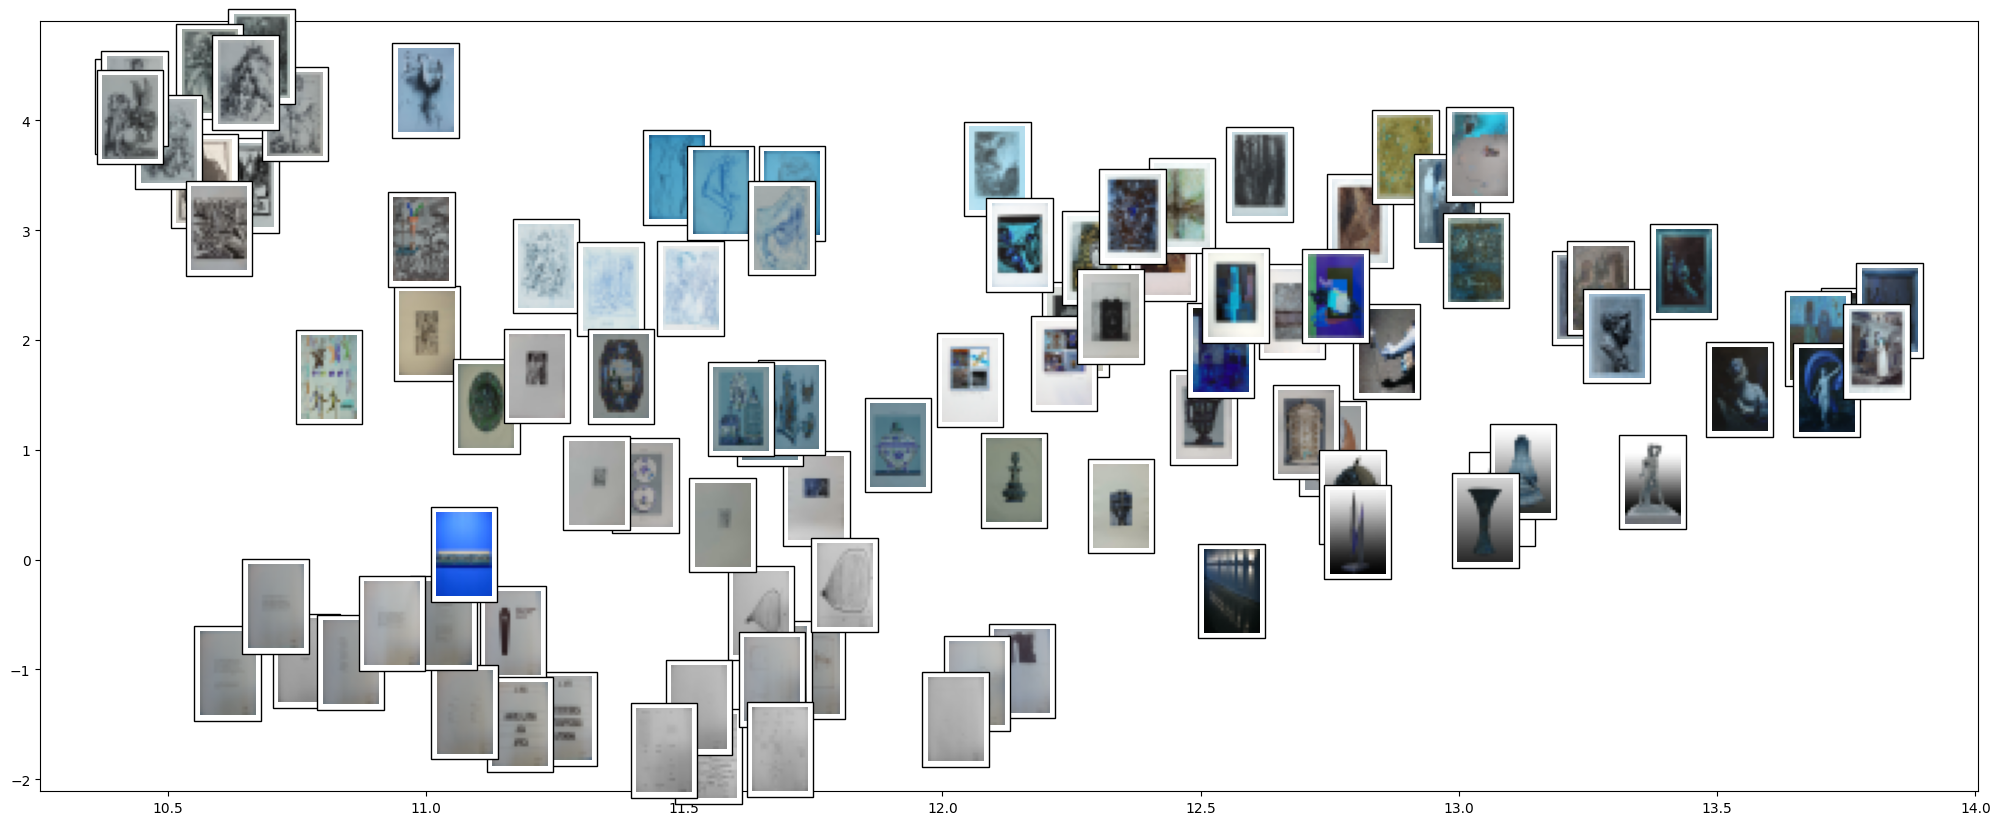

In [ ]:
# Función para reducción con UMAP
import umap

# Función para reducción con UMAP
def reducir_con_umap(data, n_neighbors=15):
    umap_model = umap.UMAP(n_neighbors=n_neighbors, n_components=2)
    umap_result = umap_model.fit_transform(data)
    return pd.DataFrame(umap_result, columns=['UMAP_1', 'UMAP_2'])

# Aplicamos UMAP
umap_dataset = reducir_con_umap(dataset_surdoc, n_neighbors=15)

# Visualizamos el resultado con UMAP
visualizar(umap_dataset, "UMAP con n_neighbors=15")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


TSNE con perplexity de 30


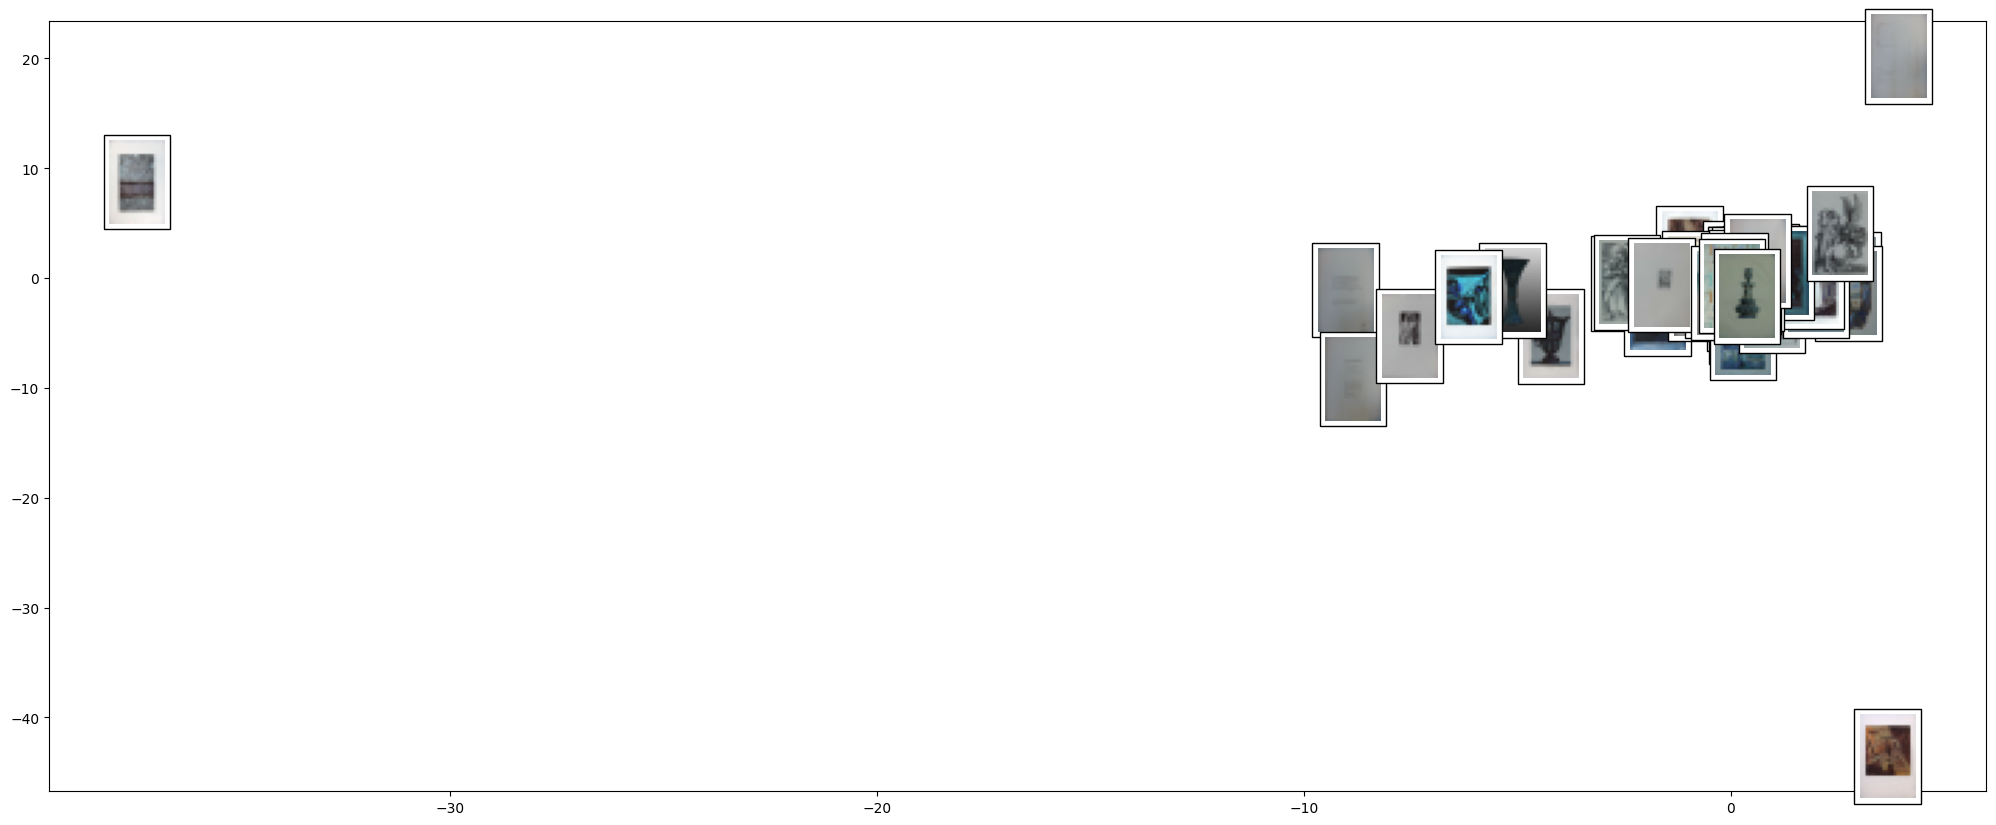

In [ ]:
# Reducción con TSNE versión 1
tsne_dataset_version_1 = reducir_con_tsne(dataset_surdoc, 30, 250)
visualizar(tsne_dataset_version_1, "TSNE con perplexity de 30")

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


TSNE con perplexity de 60


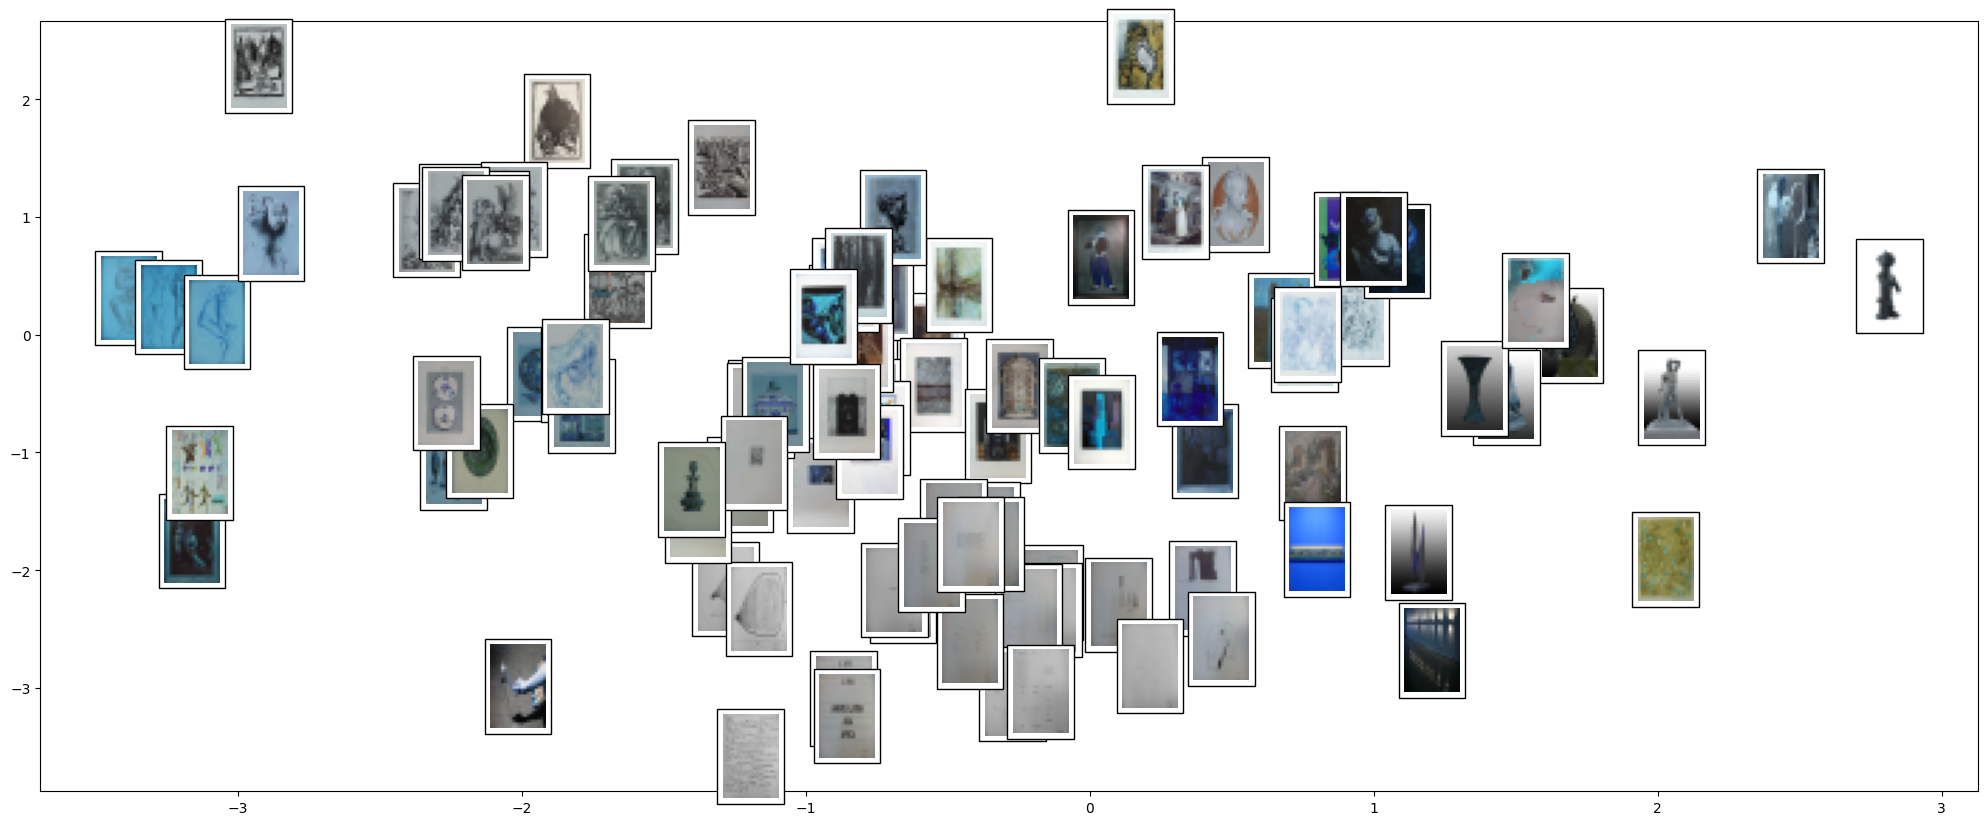

In [ ]:
# Reducción con TSNE versión 2
tsne_dataset_version_2 = reducir_con_tsne(dataset_surdoc, 60, 300)
visualizar(tsne_dataset_version_2, "TSNE con perplexity de 60")

### Comentario

¿Las pinturas similares quedan juntas? ¿Hay alguna pintura que no concuerda en algún *cluster*? ¿Qué aspectos tienen en común las imágenes que están juntas en la visualización? ¿Cuál de las 2 técnicas utilizadas aplicó una mejor reducción de dimensionalidad? Comente.


`Respuesta`:

`¿Las pinturas similares quedan juntas?`
En general, las pinturas que comparten características visuales o patrones parecen agruparse en clusters, aunque no todas las obras visualmente similares están juntas en todas las técnicas de reducción.

`¿Hay alguna pintura que no concuerda en algún cluster?`
En algunas visualizaciones (especialmente con TSNE), algunas pinturas parecen estar en un cluster que no corresponde a su estilo o características visuales. Esto puede deberse a las limitaciones del algoritmo o a la alta dimensionalidad original.

`¿Qué aspectos tienen en común las imágenes que están juntas en la visualización?`
Las imágenes que se agrupan tienden a compartir características similares en términos de color, textura y formas generales. Por ejemplo, pinturas con colores más oscuros tienden a agruparse, y aquellas con patrones o texturas más abstractas tienden a formar clusters.

`¿Cuál de las 2 técnicas aplicó una mejor reducción de dimensionalidad?`
En términos de separación clara de clusters, UMAP parece ser más efectivo que PCA, ya que preserva mejor la estructura local de los datos y agrupa más efectivamente las imágenes visualmente similares. TSNE (version 2) también proporciona agrupaciones claras, pero depende mucho de los hiperparámetros utilizados (perplexity y número de iteraciones), lo que hace que su visualización sea más variable.

---
---

### ¿Con ganas de ver más?
* Mapa interactivo con diferentes obras de arte posicionadas según reducción de dimensionalidad: https://niebla.ing.puc.cl/surdoc/

* Cómo afectan los diferentes parámetros de **TSNE** en la reducción de dimensionalidad: https://distill.pub/2016/misread-tsne/.

* Cómo afectan los diferentes parámetros de **UMAP** en la reducción de dimensionalidad: https://pair-code.github.io/understanding-umap/.